<a href="https://colab.research.google.com/github/unitinguncle/Student-Project-Bike-Sharing/blob/main/Student_Project_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Individual contribution
* Sai Kiran - Data Preprocessing
* Sai Teja - Exploratory Analysis 8,9,10,11
* Pranay - Exploratory Analysis 12,13,14
* Rahul tiwari- Exploratory and Test Train Split
* Rushikesh - Random and Decision
* Rahul kumar - KNN, Linear, Logistic



# **A) Pre-processing and exploratory data analysis.**

* Import the basic libraries required

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import std
from pylab import rcParams
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_squared_error, mean_absolute_error

* Reading the datafile as dataframe

In [ ]:
hours_basis = pd.read_csv('/content/hour - hour.csv')
day_basis = pd.read_csv("/content/day - day.csv")

* Checking for null values

In [ ]:
hours_basis.isnull().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* Checking the dataypes of the dataframe

In [ ]:
hours_basis.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

* Converting dte column to datetime datatype

In [ ]:
hours_basis["dteday"] = pd.to_datetime(hours_basis["dteday"])
day_basis["dteday"] = pd.to_datetime(day_basis["dteday"])

* Building Correlation Matrix.

In [ ]:
hours_basis.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


* Building outlier visualizations.

In [ ]:
col_list = hours_basis.drop(['instant', 'cnt', 'atemp', 'dteday'], axis =1)

13
13


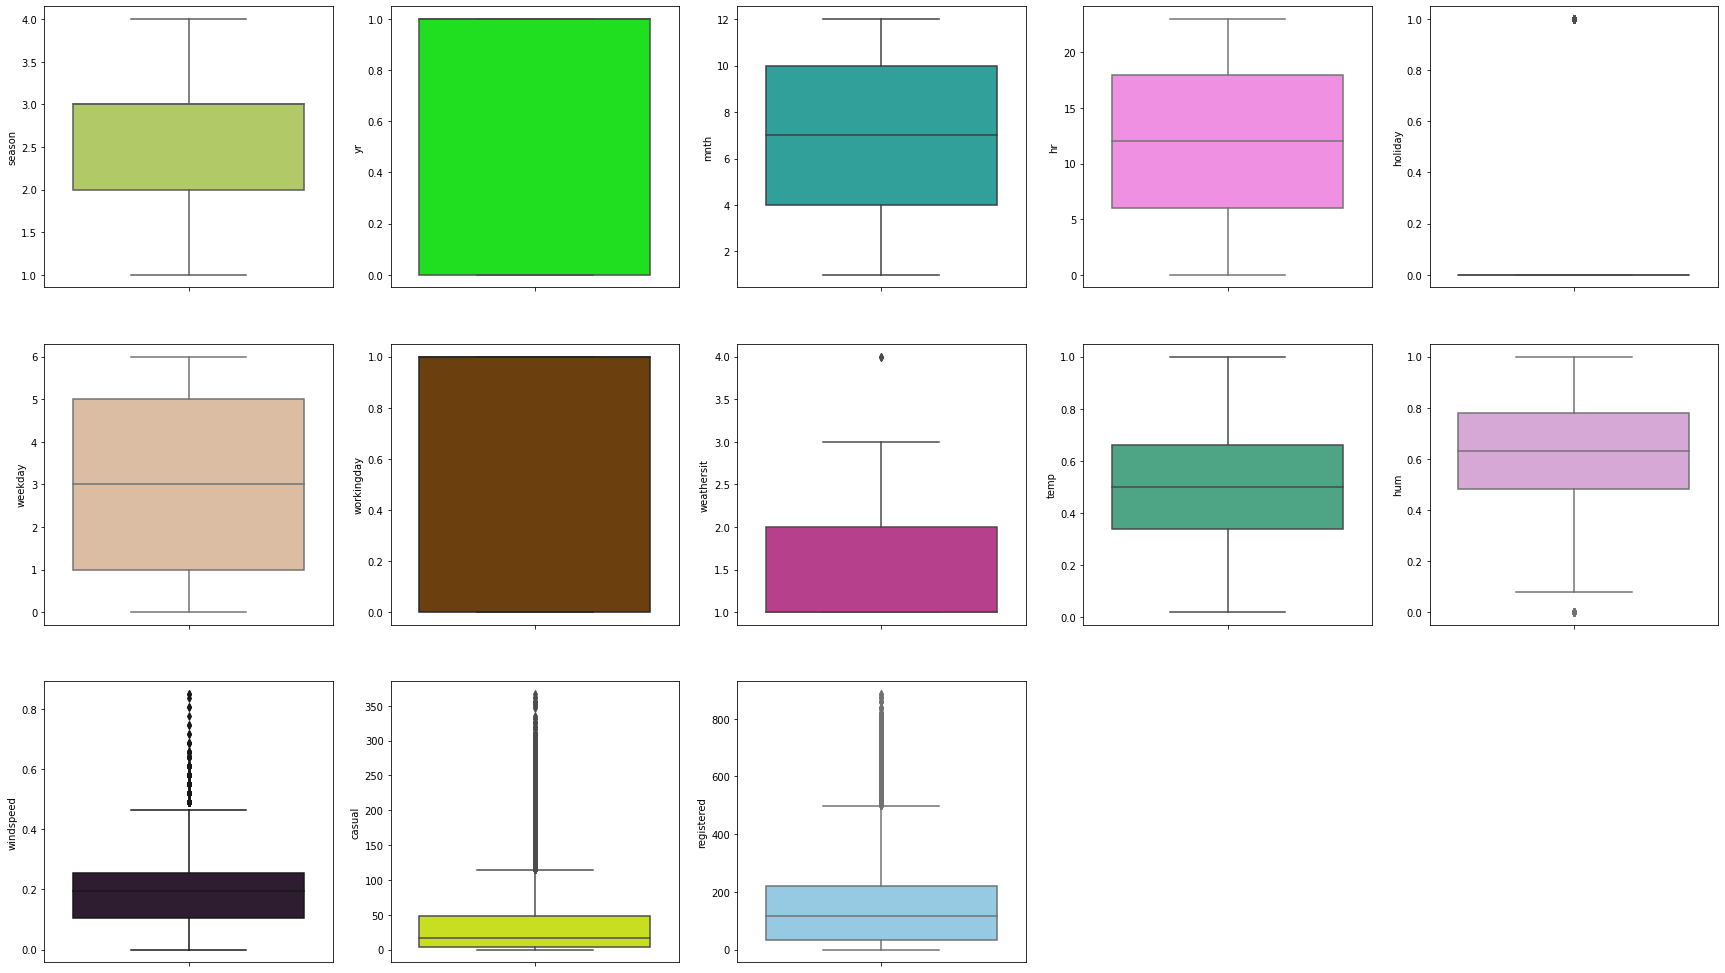

In [ ]:
loc=0
colo = ['#bada55', '#00ff00','#20b2aa','#ff80ed','#dfb722','#E3BC9A','#7b3f00','#CA2C92','#3eb489','#dda0dd','#301934','#DFFF00','#89CFF0']
print(len(colo))
plt.figure(figsize=(30,30))
for col in col_list:
  plt.subplot(5,5,loc+1)
  sns.boxplot(y = col, data = hours_basis, color=colo[loc])
  loc+=1
print(loc)
plt.show()
plt.close()

In [ ]:
day_basis = day_basis.drop(['instant'], axis=1)
hours_basis = hours_basis.drop(['instant'], axis=1)

# **B) Plots for exploratory analysis.**

* Number of bikes rented on casual basis per season [2011]

In [ ]:
hrdata = hours_basis.copy()
hrdata=hrdata.drop(['dteday'],axis=1)
yr_2011 = hrdata['yr']==0
yr_2012 = hrdata['yr']==1

s_1=hrdata['season']==1
s_2=hrdata['season']==2
s_3=hrdata['season']==3
s_4=hrdata['season']==4


yr_2011_s1=hrdata[yr_2011 & s_1]
yr_2011_s2=hrdata[yr_2011 & s_2]
yr_2011_s3=hrdata[yr_2011 & s_3]
yr_2011_s4=hrdata[yr_2011 & s_4]
yr_2012_s1=hrdata[yr_2012 & s_1]
yr_2012_s2=hrdata[yr_2012 & s_2]
yr_2012_s3=hrdata[yr_2012 & s_3]
yr_2012_s4=hrdata[yr_2012 & s_4]

z1,z2,z3,z4=(yr_2011_s1['casual'].sum()),(yr_2011_s2['casual'].sum()),(yr_2011_s3['casual'].sum()),(yr_2011_s4['casual'].sum())
w1,w2,w3,w4=(yr_2012_s1['casual'].sum()),(yr_2012_s2['casual'].sum()),(yr_2012_s3['casual'].sum()),(yr_2012_s4['casual'].sum())

z=[z1,z2,z3,z4]
w=[w1,w2,w3,w4]

x=['s1','s2','s3','s4']
plt.figure(figsize=(7,5))
plt.bar(x,z, color='pink', width = 0.35)
plt.title('Number of bikes rented on casual basis per season[2011]')
plt.show()
plt.close()

* Number of bikes rented on casual basis per season [2012]

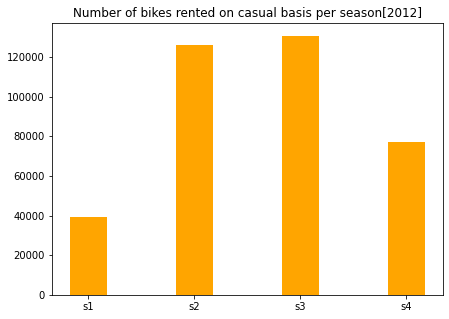

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(x,w, color="Orange", width = 0.35)
plt.title('Number of bikes rented on casual basis per season[2012]')
plt.show()
plt.close()

* Number of bikes rented on registered basis per season [2011]

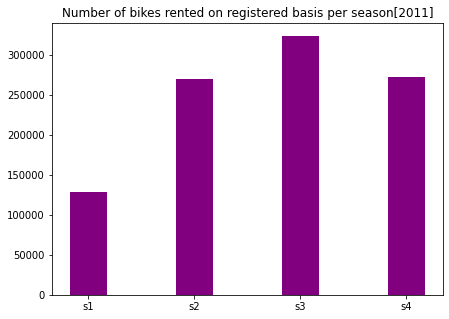

In [ ]:
z1,z2,z3,z4=(yr_2011_s1['registered'].sum()),(yr_2011_s2['registered'].sum()),(yr_2011_s3['registered'].sum()),(yr_2011_s4['registered'].sum())
w1,w2,w3,w4=(yr_2012_s1['registered'].sum()),(yr_2012_s2['registered'].sum()),(yr_2012_s3['registered'].sum()),(yr_2012_s4['registered'].sum())

z=[z1,z2,z3,z4]
w=[w1,w2,w3,w4]

x=['s1','s2','s3','s4']
plt.figure(figsize=(7,5))
plt.bar(x,z,color="PURPLE", width = 0.35)
plt.title('Number of bikes rented on registered basis per season[2011]')
plt.show()
plt.close()

* Number of bikes rented on registered basis per season [2012]

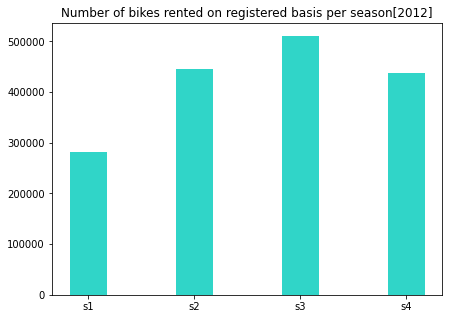

In [ ]:
x=['s1','s2','s3','s4']
plt.figure(figsize=(7,5))
plt.bar(x,w,color = '#30D5C8', width = 0.35)
plt.title('Number of bikes rented on registered basis per season[2012]')
plt.show()
plt.close()

* Visualizing Total Bike Rentals.

In [ ]:
count_of_rented = hrdata['cnt']
print('Total rented bikes : ', sum(count_of_rented))

mask_2011 = hrdata['yr']==0
mask_2012 = hrdata['yr']==1

count_in_2011 = hrdata[mask_2011]['cnt'].sum()
count_in_2012 = hrdata[mask_2012]['cnt'].sum()

print('Bikes rented in 2011 : ',count_in_2011,'\nBikes rented in 2012 : ',count_in_2012)

Total rented bikes :  3292679
Bikes rented in 2011 :  1243103 
Bikes rented in 2012 :  2049576


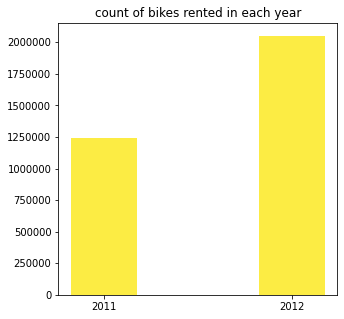

In [ ]:
plt.figure(figsize=(5,5))
cnt_lst = [count_in_2011, count_in_2012]
x=['2011','2012']
plt.ticklabel_format(style='plain')
plt.bar(x,cnt_lst, color='#fcec44', width =0.35)
plt.title("count of bikes rented in each year")
plt.show()
plt.close()

* Examining the renting behaviour seasonally.

4409 4496 4232


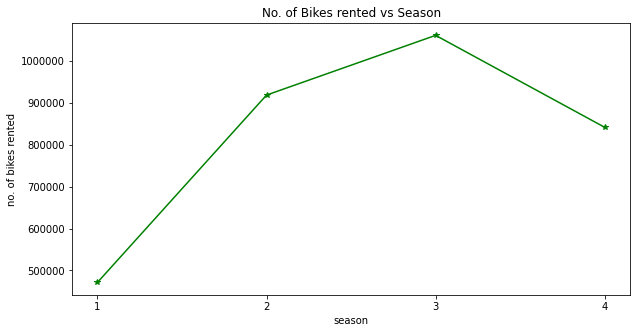

In [ ]:
spring = hrdata['season']==1
summer = hrdata['season']==2
fall = hrdata['season']==3
winter = hrdata['season']==4
print(len(hrdata[summer]),len(hrdata[fall]),len(hrdata[winter]))

spring_cnt = hrdata[spring]
summer_cnt = hrdata[summer]
fall_cnt = hrdata[fall]
winter_cnt = hrdata[winter]

x = [1,2,3,4]
y = [spring_cnt['cnt'].sum(), summer_cnt['cnt'].sum(),fall_cnt['cnt'].sum(), winter_cnt['cnt'].sum()]
plt.figure(figsize=(10,5))
plt.xlabel('season')
plt.ylabel('no. of bikes rented')
plt.title('No. of Bikes rented vs Season')
plt.xticks([1,2,3,4])
plt.ticklabel_format(style='plain')
plt.plot(x,y,'*-',color='green')
plt.show()
plt.close()

* Finding maximum rental months across each season.

In [ ]:
season1 = hrdata['season']==1
season1 = hrdata[season1]

season2 = hrdata['season']==2
season2 = hrdata[season2]

season3 = hrdata['season']==3
season3 = hrdata[season3]

season4 = hrdata['season']==4
season4 = hrdata[season4]

print('Months in each season: ',season1['mnth'].unique(),season2['mnth'].unique(),season3['mnth'].unique(),season4['mnth'].unique())


Months in each season:  [ 1  2  3 12] [3 4 5 6] [6 7 8 9] [ 9 10 11 12]


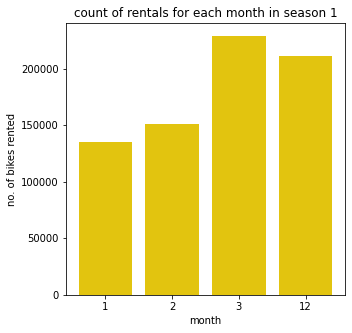

In [ ]:
mnth_1 = hrdata['mnth']==1
mnth_2 = hrdata['mnth']==2
mnth_3 = hrdata['mnth']==3
mnth_12 = hrdata['mnth']==12
lst = [hrdata[mnth_1]['cnt'].sum(),hrdata[mnth_2]['cnt'].sum(),hrdata[mnth_3]['cnt'].sum(),hrdata[mnth_12]['cnt'].sum()]


plt.figure(figsize=(5,5))
x=['1','2','3','12']
plt.bar(x,lst, color='#E2C40F')
plt.title('count of rentals for each month in season 1')
plt.xlabel('month')
plt.ylabel('no. of bikes rented')
plt.show()
plt.close()

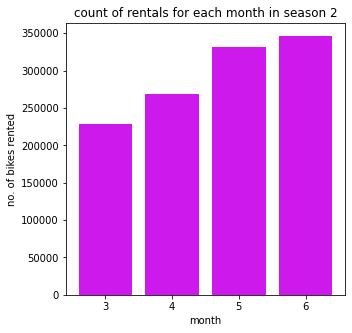

In [ ]:
mnth_3 = hrdata['mnth']==3
mnth_4 = hrdata['mnth']==4
mnth_5 = hrdata['mnth']==5
mnth_6 = hrdata['mnth']==6

lst = [hrdata[mnth_3]['cnt'].sum(),hrdata[mnth_4]['cnt'].sum(),hrdata[mnth_5]['cnt'].sum(),hrdata[mnth_6]['cnt'].sum()]

plt.figure(figsize=(5,5))
x=['3','4','5','6']
plt.bar(x,lst, color='#CD19EB')
plt.title('count of rentals for each month in season 2')
plt.xlabel('month')
plt.ylabel('no. of bikes rented')
plt.show()
plt.close()

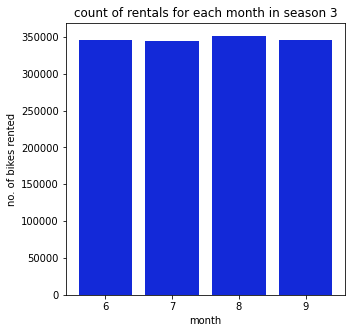

In [ ]:
mnth_6 = hrdata['mnth']==6
mnth_7 = hrdata['mnth']==7
mnth_8 = hrdata['mnth']==8
mnth_9 = hrdata['mnth']==9

lst = [hrdata[mnth_6]['cnt'].sum(),hrdata[mnth_7]['cnt'].sum(),hrdata[mnth_8]['cnt'].sum(),hrdata[mnth_9]['cnt'].sum()]

plt.figure(figsize=(5,5))
x=['6','7','8','9']
plt.bar(x,lst, color='#1329D8')
plt.title('count of rentals for each month in season 3')
plt.xlabel('month')
plt.ylabel('no. of bikes rented')
plt.show()
plt.close()

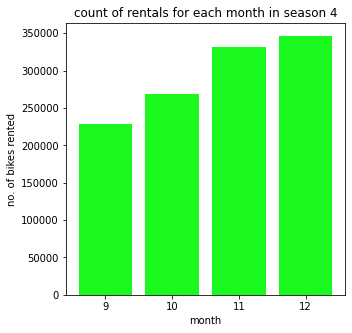

In [ ]:
mnth_9 = hrdata['mnth']==9
mnth_10 = hrdata['mnth']==10
mnth_11 = hrdata['mnth']==11
mnth_12 = hrdata['mnth']==12

lst = [hrdata[mnth_3]['cnt'].sum(),hrdata[mnth_4]['cnt'].sum(),hrdata[mnth_5]['cnt'].sum(),hrdata[mnth_6]['cnt'].sum()]

plt.figure(figsize=(5,5))
x=['9','10','11','12']
plt.bar(x,lst, color='#1AF91D')
plt.title('count of rentals for each month in season 4')
plt.xlabel('month')
plt.ylabel('no. of bikes rented')
plt.show()
plt.close()

* Relation of weather on affecting rents

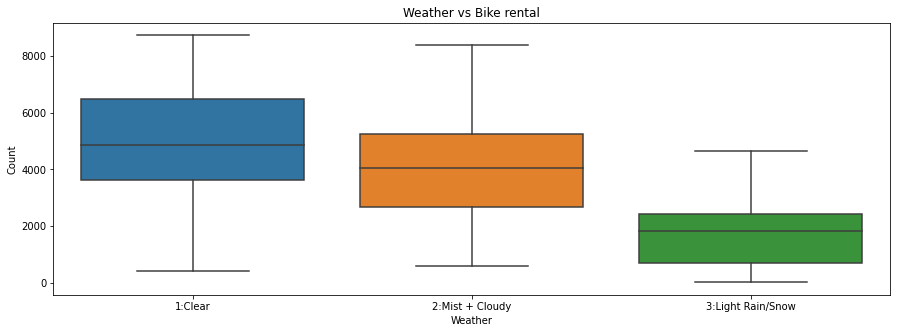

In [ ]:
rcParams['figure.figsize'] = 15,5
sns.boxplot(x='weathersit',y='cnt',data=day_basis)
plt.title('Weather vs Bike rental')
plt.xlabel('Weather')
plt.xticks(np.arange(3), ('1:Clear', '2:Mist + Cloudy', '3:Light Rain/Snow'))
plt.ylabel('Count')
plt.show()

* Plotting rental count for each months.

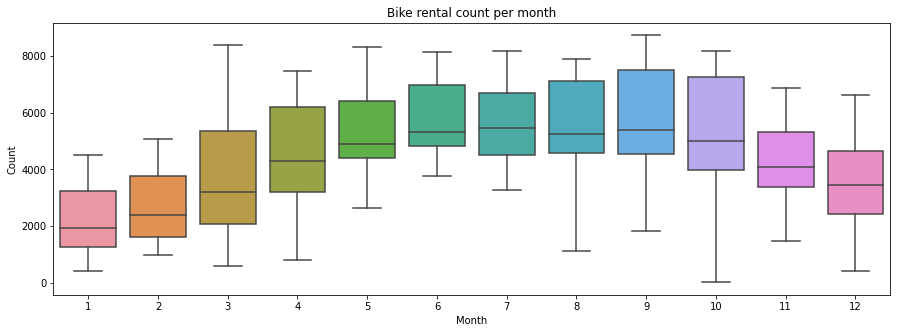

In [ ]:
rcParams['figure.figsize'] = 15, 5
sns.boxplot(x='mnth',y='cnt',data=day_basis)
plt.title('Bike rental count per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

* Demand of bike rentals per season.

Text(0, 0.5, 'Rental counts')

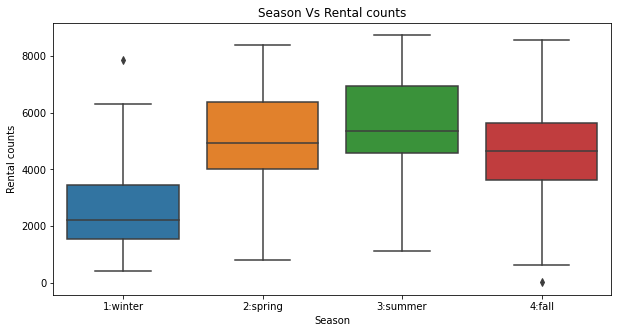

In [ ]:
rcParams['figure.figsize'] = 10, 5
sns.boxplot(x = 'season', y = 'cnt', data = day_basis) 
plt.title('Season Vs Rental counts')
plt.xlabel('Season')
plt.xticks(np.arange(4), ('1:winter', '2:spring', '3:summer', '4:fall'))
plt.ylabel('Rental counts')

* Skewness in distribution

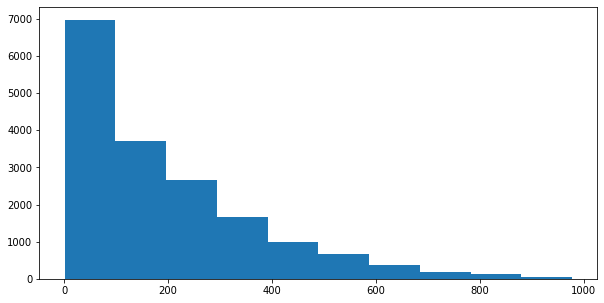

In [ ]:
plt.hist((hours_basis.loc[:,'cnt']))
plt.show()

* Visualizing Bike Rental per day.

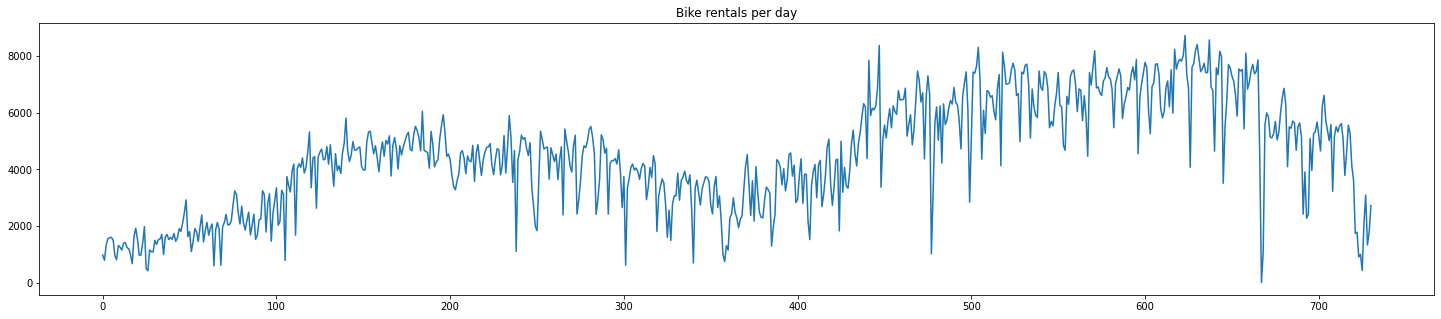

In [ ]:
rcParams['figure.figsize'] = 25, 5
plt.plot(day_basis['cnt'])
plt.title('Bike rentals per day')
plt.show()

* Scatter Plotting the data against target column.

In [ ]:
FEATURES = hours_basis.drop(["cnt"], axis=1)
LABEL = hours_basis["cnt"]

In [ ]:
from typing import List

def plotting(df: pd.DataFrame, FEATURES: List[str], LABEL:str) -> None:
  plt.figure(figsize = (20,20))
  for loc,FEATURES in enumerate(FEATURES):
    ax = plt.subplot(4, 4, loc+1)
    sns.scatterplot(x=FEATURES, y=LABEL, data=df)
  plt.show()
  plt.close()
  return None

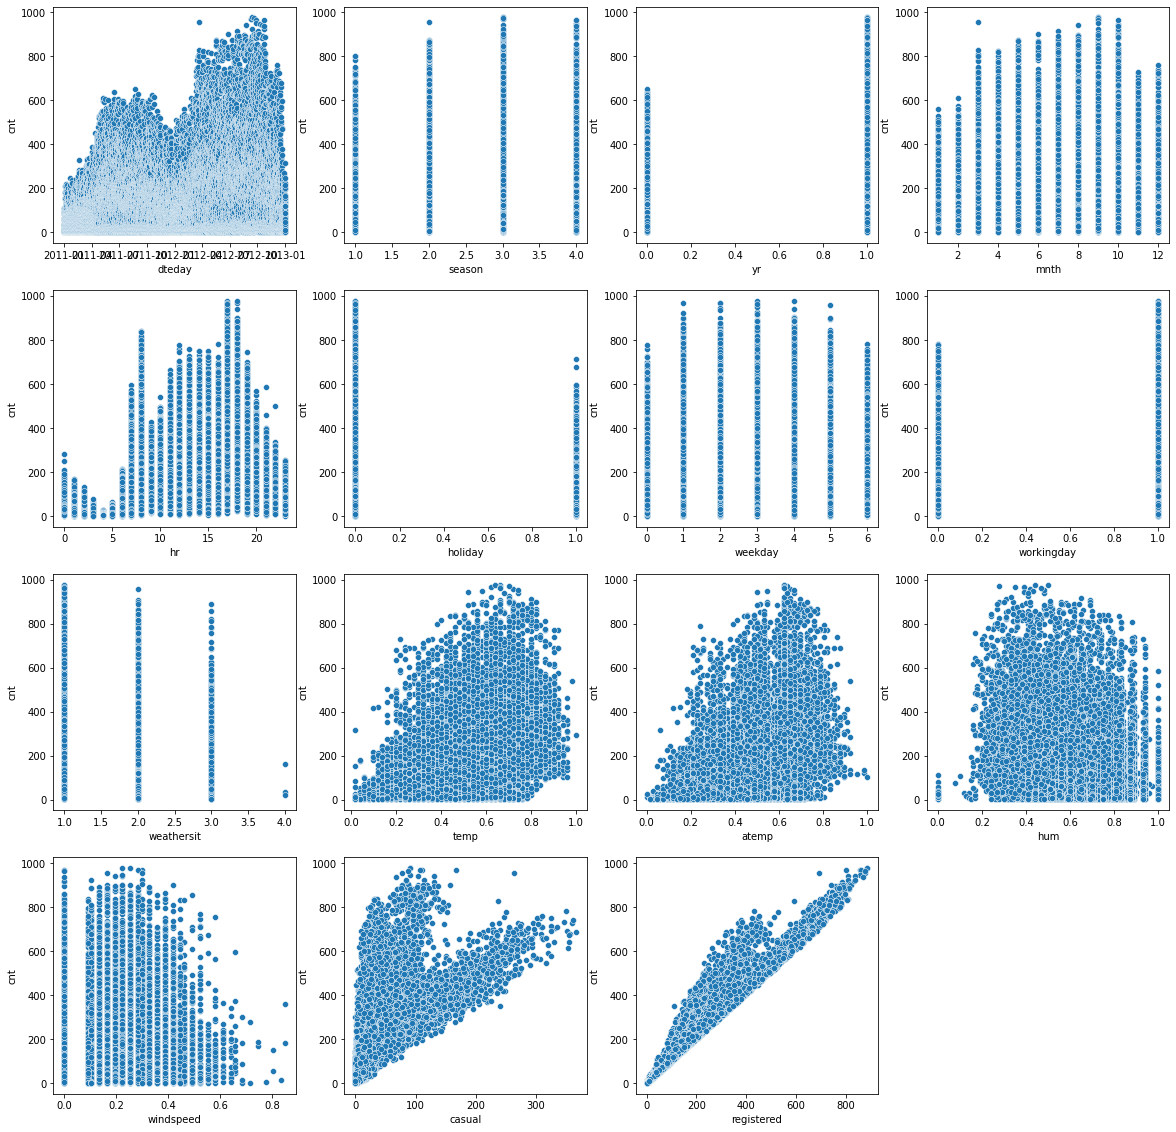

In [ ]:
plotting(hours_basis, FEATURES, LABEL)

* Visualizing data dependency using Heat map.

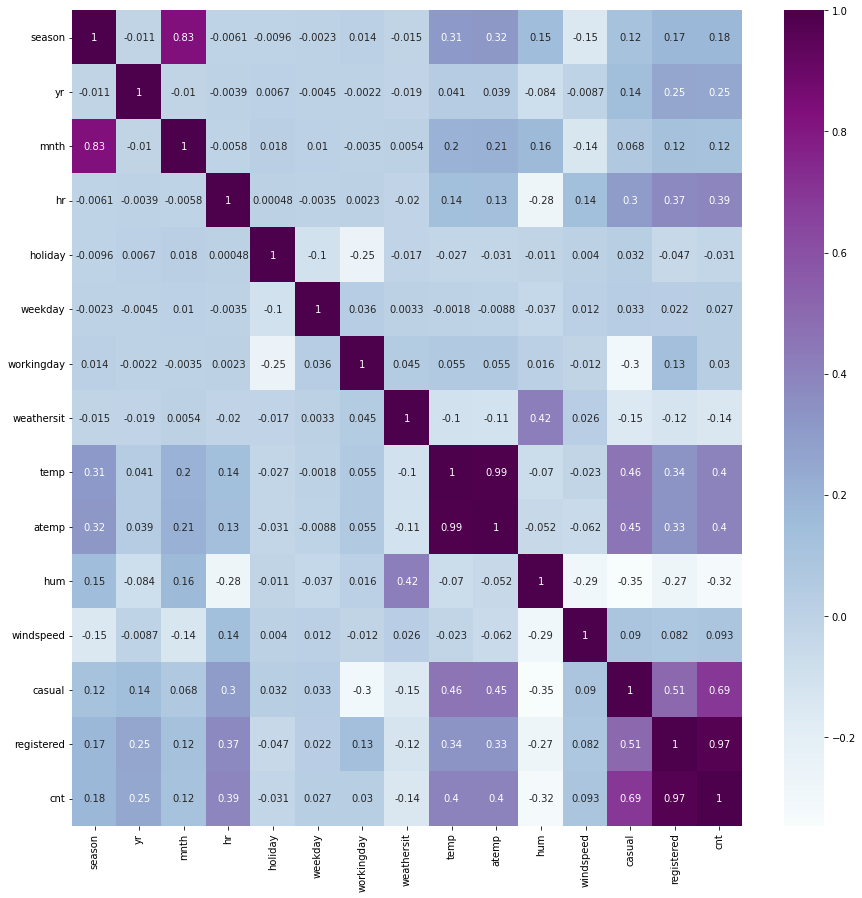

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(hours_basis.corr(), annot =True, cmap='BuPu')
plt.show()
plt.close()

In [ ]:
hours_basis.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(hours_basis.drop(["dteday"], axis=1))
standardized_df = pd.DataFrame(standardized_data, columns=hours_basis.drop(["dteday"], axis=1).columns)

# **C) Model Building**

In [ ]:
hours_basis = hours_basis.dropna()

In [ ]:
features = hours_basis.drop(['dteday', 'cnt'], axis =1)
target = hours_basis['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state=22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15641, 14) (1738, 14) (15641,) (1738,)


In [ ]:
def rmse_calculation(actual_train, pred_train, actual_test, pred_test):
    return (f"\nRMSE Train: {sqrt(mean_squared_error(actual_train, pred_train)):.2f}\nRMSE Test: {sqrt(mean_squared_error(actual_test, pred_test)):.2f}\n")

def score_calculation(model, X_train, X_test, y_train, y_test):
    return(f"\nTrain Score: {model.score(X_train, y_train)*100:.2f}\nTest Score: {model.score(X_test, y_test)*100:.2f}\n")

# *Random forest regressor(without standardized data)*

In [ ]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)


In [ ]:
print(f"Mean Absolute Error for Random Forest Regressor : {mean_absolute_error(y_test,test_preds)} \n")
print(f"Score for Random Forest Regressor : {score_calculation(clf,  X_train, X_test, y_train, y_test)} ")
print(f"RMSE for Random Forest Regressor : {rmse_calculation(y_train, train_preds, y_test, test_preds)} ")


Mean Absolute Error for Random Forest Regressor : 0.8447698504027613 

Score for Random Forest Regressor : 
Train Score: 100.00
Test Score: 99.99
 
RMSE for Random Forest Regressor : 
RMSE Train: 1.02
RMSE Test: 2.06
 


# *Random forest regressor (using Standardized data)*

In [ ]:
features2 = standardized_df.drop(['cnt'], axis =1)
target2 = standardized_df['cnt']

X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size = 0.1, random_state=22)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(15641, 14) (1738, 14) (15641,) (1738,)


In [ ]:
clf = RandomForestRegressor()
clf.fit(X_train2, y_train2)

train_preds2 = clf.predict(X_train2)
test_preds2 = clf.predict(X_test2)

In [ ]:
print(f"Mean Absolute Error for Random Forest Regressor (with standardization) : {mean_absolute_error(y_test2,test_preds2)} \n")
print(f"Score for Random Forest Regressor (with standardization) : {score_calculation(clf,  X_train2, X_test2, y_train2, y_test2)} ")
print(f"RMSE for Random Forest Regressor (with standardization) : {rmse_calculation(y_train2, train_preds2, y_test2, test_preds2)} ")


Mean Absolute Error for Random Forest Regressor (with standardization) : 0.004774450245329373 

Score for Random Forest Regressor (with standardization) : 
Train Score: 100.00
Test Score: 99.99
 
RMSE for Random Forest Regressor (with standardization) : 
RMSE Train: 0.01
RMSE Test: 0.01
 


# *Decision Tree*
Decision tree doesn't work with Standardized data

In [ ]:
dt_model = DecisionTreeClassifier(max_depth = 25, random_state = 22)
dt_model.fit(X_train, y_train)

train_predict_dt = dt_model.predict(X_train)
test_predict_dt = dt_model.predict(X_test)


In [ ]:
print("Accuracy Score for Decision Tree :")
print(f"Train scores: {accuracy_score(y_train, train_predict_dt)*100:.2f}")
print(f"Test scores: {accuracy_score(y_test, test_predict_dt)*100:.2f}")
print(f"\nRMSE for Decision Tree : {rmse_calculation(y_train, train_predict_dt, y_test, test_predict_dt)}")

Accuracy Score for Decision Tree :
Train scores: 99.39
Test scores: 34.81

RMSE for Decision Tree : 
RMSE Train: 1.97
RMSE Test: 8.68



# *KNN Algorithm*

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

train_predictions_knn = knn_model.predict(X_train) 
test_predictions_knn = knn_model.predict(X_test) 


In [ ]:
print("Accuracy Score for Decision Tree :")
print(f"Train accuracy: {accuracy_score(y_train, train_predictions_knn)*100:.2f}")
print(f"Test accuracy: {accuracy_score(y_test, test_predictions_knn)*100:.2f}")
print(f"\nRMSE for KNN : {rmse_calculation(y_train, train_predictions_knn, y_test, test_predictions_knn)}")

Accuracy Score for Decision Tree :
Train accuracy: 100.00
Test accuracy: 22.27

RMSE for KNN : 
RMSE Train: 0.00
RMSE Test: 2.96



# *Linear Regression*

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

train_predictions_lr = linear_model.predict(X_train) 
test_predictions_lr = linear_model.predict(X_test)

print(f"Bias (c) : {linear_model.intercept_}\n")
print(f"Weights (m1, m2 ... mn) : \n\n{linear_model.coef_}")

Bias (c) : 2.842170943040401e-14

Weights (m1, m2 ... mn) : 

[-6.58173710e-15  6.90558721e-14  1.24900090e-16 -4.70771425e-15
 -1.39320792e-14 -1.14215278e-15  6.99407979e-15  3.31906811e-15
 -1.20247996e-13  1.52408468e-14 -7.32781891e-14 -1.03026311e-14
  1.00000000e+00  1.00000000e+00]


In [ ]:
print(f"Mean Absolute Error for Linear Regression : {mean_absolute_error(y_test,test_predictions_lr)} \n")
print(f"Score for Linear Regression : {score_calculation(linear_model,  X_train, X_test, y_train, y_test)} ")
print(f"RMSE for Linear Regression : {rmse_calculation(y_train, train_predictions_lr, y_test, test_predictions_lr)} ")

Mean Absolute Error for Linear Regression : 8.056380010114657e-14 

Score for Linear Regression : 
Train Score: 100.00
Test Score: 100.00
 
RMSE for Linear Regression : 
RMSE Train: 0.00
RMSE Test: 0.00
 


# *Logistic Regression*

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

train_predictions_lr = logistic_model.predict(X_train) 
test_predictions_lr = logistic_model.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(f"Train accuracy: {accuracy_score(y_train, train_predictions_lr)*100:.2f}")
print(f"Test accuracy: {accuracy_score(y_test, test_predictions_lr)*100:.2f}")

Train accuracy: 4.23
Test accuracy: 2.82
